# Analysis for Variance: 

ANOVA is an extension of independent t test for testing the equality of two population means.

When we to compare more than 2 population means, we use ANOVA. 

Typically the Null Hypothesis H0: u1 = u2 = u3 = uk for testing population means for K population. 

Prerequisties for ANOVA testing: 

a) The samples drawn from different populations are independent and random.

b) The response variables of all the populations are normally distrubuted.

c) The variances of all populations are equal. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
import seaborn as sns 

iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
import pandas as pd

In [6]:
df = iris[["sepal_width", "species"]]
df.head()

,sepal_width,species
0,3.5,setosa
1,3.0,setosa
2,3.2,setosa
3,3.1,setosa
4,3.6,setosa


In [7]:
#let us check the unique number of entries in the newly created dataframe 

df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
df.loc[df["species"] == "setosa"].head()

,sepal_width,species
0,3.5,setosa
1,3.0,setosa
2,3.2,setosa
3,3.1,setosa
4,3.6,setosa


In [9]:
df.loc[df["species"] == "versicolor"].head()

,sepal_width,species
50,3.2,versicolor
51,3.2,versicolor
52,3.1,versicolor
53,2.3,versicolor
54,2.8,versicolor


In [10]:
df.loc[df["species"] == "virginica"].head()

,sepal_width,species
100,3.3,virginica
101,2.7,virginica
102,3.0,virginica
103,2.9,virginica
104,3.0,virginica


<IPython.core.display.Javascript object>

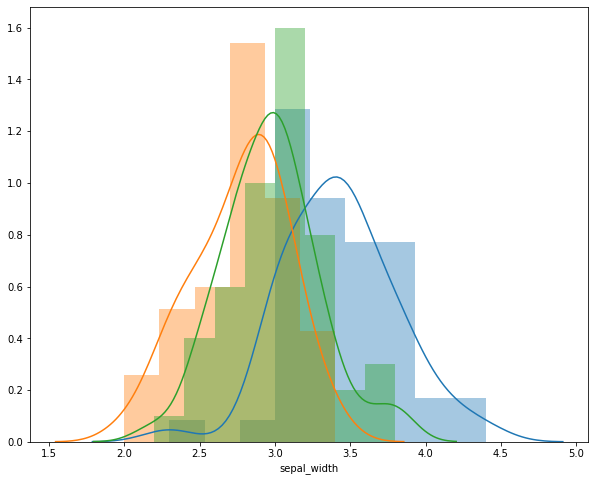

In [19]:
plt.figure(figsize = (10,8))
sns.distplot(df.loc[df["species"] == "setosa"]["sepal_width"])
sns.distplot(df.loc[df["species"] == "versicolor"]["sepal_width"])
sns.distplot(df.loc[df["species"] == "virginica"]["sepal_width"])
#from the histogram the interpretation is a)each of the groups looks to be normal b) between the group variance looks to be quite less therefore ANOVA is the right tool

In [12]:
# test for normality by shaphiro test

from scipy.stats import shapiro

In [13]:
names = iris.get("species")

In [14]:
shapiro(df["sepal_width"][df["species"] == "setosa"])

(0.97171950340271, 0.2715264856815338)

In [15]:
shapiro(df["sepal_width"][df["species"] == "versicolor"])

(0.9741330742835999, 0.33798879384994507)

In [16]:
shapiro(df["sepal_width"][df["species"] == "virginica"])

(0.9673910140991211, 0.1809043288230896)

In [23]:
#check for assumption 2 
a = df.loc[df["species"] == 'setosa']
b = df.loc[df["species"] == 'versicolor']
c = df.loc[df["species"] == 'virginica']

In [24]:
print("The covariance matrix of the sepal width of setosa and versicolor is :", '\n',
     np.cov(a['sepal_width'], b['sepal_width']))
print("The covariance matrix of the sepal width of setosa and versicolor is :", '\n',
     np.cov(a['sepal_width'], c['sepal_width']))
print("The covariance matrix of the sepal width of setosa and versicolor is :", '\n',
     np.cov(b['sepal_width'], c['sepal_width']))

<IPython.core.display.Javascript object>

The covariance matrix of the sepal width of setosa and versicolor is : 
 [[ 0.1436898  -0.01710204]
 [-0.01710204  0.09846939]]


<IPython.core.display.Javascript object>

The covariance matrix of the sepal width of setosa and versicolor is : 
 [[0.1436898  0.00074286]
 [0.00074286 0.10400408]]


<IPython.core.display.Javascript object>

The covariance matrix of the sepal width of setosa and versicolor is : 
 [[ 0.09846939 -0.0087551 ]
 [-0.0087551   0.10400408]]


In [30]:
from scipy.stats import pearsonr

corr, _ = pearsonr(a['sepal_width'], b['sepal_width'])
print('Pearsonr correlation coefficient of sepal width of setosa and versicolor is: %.3f' % corr)

Pearsonr correlation coefficient of sepal width of setosa and versicolor is: -0.144


In [31]:
pearsonr(a['sepal_width'], b['sepal_width'])

(-0.1437753242774102, 0.3191924651424605)

In [32]:
pearsonr(a['sepal_width'], c['sepal_width'])

(0.006076690928400574, 0.9665925671071837)

In [33]:
pearsonr(b['sepal_width'], c['sepal_width'])

(-0.0865138026614621, 0.5502443700407327)

In [35]:
#check for assumption 3 
unique= names.unique()
unique

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [36]:
from scipy.stats import levene

In [37]:
levene(df['sepal_width'][df['species'] == 'setosa'],
      df['sepal_width'][df['species'] == 'versicolor'], 
      df['sepal_width'][df['species'] == 'virginica'])

LeveneResult(statistic=0.5902115655853319, pvalue=0.5555178984739075)

In [38]:
#perform one-way test F-Test 

import scipy.stats as stats 

In [39]:
stats.f_oneway(df['sepal_width'][df['species'] == 'setosa'],
      df['sepal_width'][df['species'] == 'versicolor'], 
      df['sepal_width'][df['species'] == 'virginica'])

F_onewayResult(statistic=49.160040089612075, pvalue=4.492017133309115e-17)

In [44]:
#Check ANOVA assumption of Sepal_length 
df1 = iris[["sepal_length", "species"]]
df1.head()

,sepal_length,species
0,5.1,setosa
1,4.9,setosa
2,4.7,setosa
3,4.6,setosa
4,5.0,setosa


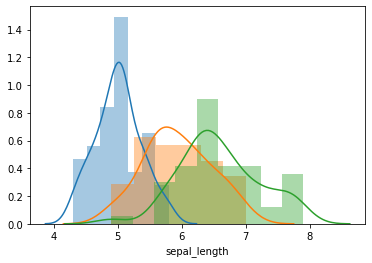

In [45]:
sns.distplot(df1.loc[df["species"] == "setosa"]["sepal_length"])
sns.distplot(df1.loc[df["species"] == "versicolor"]["sepal_length"])
sns.distplot(df1.loc[df["species"] == "virginica"]["sepal_length"])

In [46]:
shapiro(df1["sepal_length"][df["species"] == "setosa"])

(0.9776989221572876, 0.4595281183719635)

In [47]:
shapiro(df1["sepal_length"][df["species"] == "versicolor"])

(0.9778355956077576, 0.46473264694213867)

In [48]:
shapiro(df1["sepal_length"][df["species"] == "virginica"])

(0.9711798429489136, 0.25832483172416687)

In [49]:
a1 = df1.loc[df["species"] == 'setosa']
b1 = df1.loc[df["species"] == 'versicolor']
c1 = df1.loc[df["species"] == 'virginica']

In [50]:
pearsonr(a1['sepal_length'], b1['sepal_length'])

(-0.0808497270175701, 0.5767425210865983)

In [51]:
pearsonr(a1['sepal_length'], c1['sepal_length'])

(0.13417210385493566, 0.35291326744905)

In [52]:
pearsonr(b1['sepal_length'], c1['sepal_length'])

(-0.14166588513698913, 0.32641852877467964)

In [53]:
levene(df1['sepal_length'][df['species'] == 'setosa'],
      df1['sepal_length'][df['species'] == 'versicolor'], 
      df1['sepal_length'][df['species'] == 'virginica'])

LeveneResult(statistic=6.35272002048269, pvalue=0.0022585277836218586)

1-way ANOVA

In [54]:
df = iris[["sepal_width", "species"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
sepal_width    150 non-null float64
species        150 non-null object
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [61]:
df['species'] = df['species'].astype('category')

C:\Users\Chintu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
sepal_width    150 non-null float64
species        150 non-null category
dtypes: category(1), float64(1)
memory usage: 1.5 KB


In [63]:
from statsmodels.formula.api import ols #for n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm #for n-way ANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd #for performing the Tukey-HSD test
from statsmodels.stats.multicomp import MultiComparison #To compare the levels of independent Var & dependent Var

In [64]:
formula = 'sepal_width ~ C(species)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

               df     sum_sq   mean_sq         F        PR(>F)
C(species)    2.0  11.344933  5.672467  49.16004  4.492017e-17
Residual    147.0  16.962000  0.115388       NaN           NaN


Now, we see that the results that we got using the F-Test method is same as the result that we are getting after performing the ANOVA

In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
sepal_length    150 non-null float64
species         150 non-null object
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [68]:
df1['species'] = df1['species'].astype('category')

C:\Users\Chintu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
formula = 'sepal_length ~ C(species)'
model = ols(formula, df1).fit()
aov_table = anova_lm(model)
print(aov_table)

               df     sum_sq    mean_sq           F        PR(>F)
C(species)    2.0  63.212133  31.606067  119.264502  1.669669e-31
Residual    147.0  38.956200   0.265008         NaN           NaN


#The above failed the 3-assumption of ANOVA but tired the ANOVA

In [72]:
mc = MultiComparison(df['sepal_width'], df['species'])
result = mc.tukeyhsd()

print(result)
print(mc.groupsunique)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
    setosa versicolor   -0.658  0.001 -0.8189 -0.4971   True
    setosa  virginica   -0.454  0.001 -0.6149 -0.2931   True
versicolor  virginica    0.204 0.0088  0.0431  0.3649   True
------------------------------------------------------------
['setosa' 'versicolor' 'virginica']


from the above table, we can infer that the means of sepal_width fir all the categories of "species" is different